In [10]:
import networkx as nx
import itertools
import numpy.random as rnd
import matplotlib.pyplot as plt

In [11]:
# Поддерживаются следующие основные типы графов:
# 1. Graph – реализация простого неориентированного графа. Дополнительные вершины между двумя узлами игнорируются, возможны узлы соединённые с самим собой.
# 2. DiGraph — ориентированный граф, добавлены функции и ограничения специфические для этого типа графов.
# 3. MultiGraph — реализация мультиграфов, в таких графах граф, возможно существование пар вершин, которые соединены более чем одним ребром (ненаправленным), 
#    либо более чем двумя дугами противоположных направлений.
# 4. MultiDiGraph — соответственно ориентированный мультиграф.

In [12]:
# Примеры
# G=nx.Graph()
# G=nx.DiGraph()
# G=nx.MultiGraph()
# G=nx.MultiDiGraph()

## Создание простого графа

In [58]:
# Экземпляр класса nx.Graph (именно он будет являться рабочим классом):
graph = nx.Graph()
graph

In [59]:
# Добавляем вершины, используя метод add_node()
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')
graph.add_node('D')
graph.add_node('E')

graph.nodes()

NodeView(('A', 'B', 'C', 'D', 'E'))

In [60]:
# Функция для добавления рёбер
def add_edge(f_item, s_item, graph=None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item) 

In [63]:
# Добавляем ребра
add_edge('A', 'B', graph=graph)
add_edge('A', 'C', graph=graph)
add_edge('A', 'D', graph=graph)
add_edge('C', 'E', graph=graph)
add_edge('E', 'D', graph=graph)


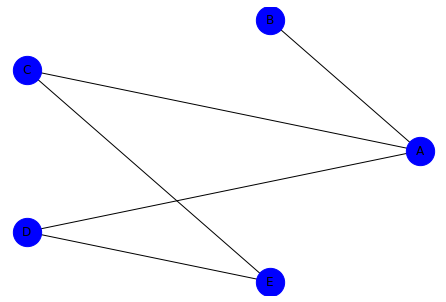

In [65]:
# Визуализируем граф
nx.draw_circular(graph,
         node_color='blue',
         node_size=800,
         with_labels=True)

In [79]:
# Создание вершин графа с помощью метода add_nodes_from
cities = {'A':(0, 20),
     'B':(15, 24),
     'C':(16, 41),
     'D':(10, 40)}

graph = nx.Graph()
graph.add_nodes_from(cities)

kilometres = {('A', 'B',15),
              ('B', 'C', 16),
              ('B', 'D', 25),
              ('C', 'D', 14),
              ('D', 'A', 18)}

graph.add_weighted_edges_from(kilometres)

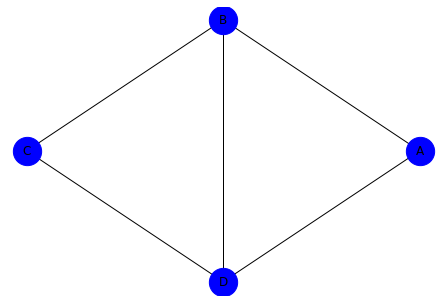

In [80]:
# Визуализируем граф
nx.draw_circular(graph,
         node_color='blue',
         node_size=800,
         with_labels=True)

## Создание полносвязного графа

In [82]:
# Полносвязный граф — граф, где каждая вершина соединена с каждой другой.

In [83]:
def complete_graph(N: int) -> nx.Graph:
    graph = nx.Graph()
   
    N_range = range(N)
   
    all_pairs = itertools.permutations(N_range, 2)
   
    graph.add_nodes_from(N_range)
    graph.add_edges_from(all_pairs)
   
    return graph

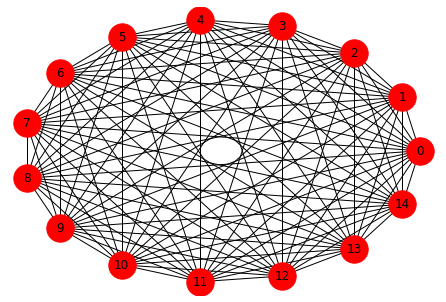

In [93]:
graph = complete_graph(15)

nx.draw_circular(graph, 
         node_color='r',
         node_size=750,
         with_labels=True)

## Граф Эрдьёша-Реньи

In [85]:
# Граф Эрдьёша-Реньи — граф, который построен моделью Эрдьёша-Реньи, которых существует два вида — G(n, p) и G(n, m), 
# где n — кол-во вершин графа, p — вероятность того, что две вершины соединены, а m — кол-во рёбер графа.

In [88]:
def random_graph(n:int, p:float) -> nx.Graph:
    graph = nx.Graph()
   
    N_range = range(n)
    graph.add_nodes_from(N_range)
   
    for pair in itertools.permutations(N_range, 2):
        if rnd.random() < p: graph.add_edge(*pair)
   
    return graph

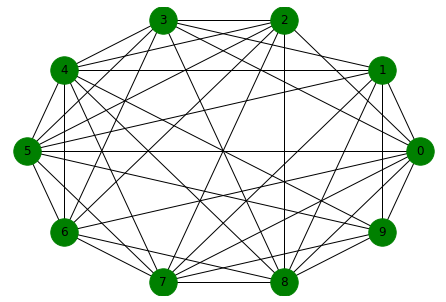

In [101]:
graph = random_graph(10, 0.5)

nx.draw_circular(graph,
          node_color='g',
         node_size=750,
         with_labels=True)